<h1>Titanic Dataset Analysis

## Introduction

### Dataset Overview
The Titanic dataset contains detailed information about the passengers aboard the RMS Titanic, which sank on its maiden voyage in April 1912. The dataset is widely used to explore data analysis techniques, feature engineering, and predictive modeling.

### Purpose of Analysis
The primary purpose of this analysis is to explore and understand the factors that influenced passenger survival during the Titanic disaster. Specifically, we will examine factors such as:
- Age
- Class
- Gender
- Family size

<h4>Importing all libraries need in analysis of Titanic Dataset

In [1]:
import numpy as np                       #for numerical computation
import pandas as pd                      #for data manipulation and analysis
import matplotlib.pyplot as plt          #for data visualization
import seaborn as sns                    #for data visualization

In [2]:
#Changing setting of pandas to display full dataset instead of showing dotted data columns
pd.set_option('display.max_rows',None)

<h2>1.Data Collection

<h5>>Listing the Titanic Data directory

In [3]:
import os                               #for listing the files in titanic directory
os.listdir("C:/jupyter/titanic")

['.ipynb_checkpoints',
 'combined_TitanicDataset.csv',
 'gender_submission.csv',
 'test.csv',
 'train.csv']

<h5>>Loading the data into Pandas DataFrame

In [4]:
train_df=pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')
submission_df=pd.read_csv('titanic/gender_submission.csv')

<h5>>Displying first 5 records of Titanic Dataset

In [46]:
print("Train Dataset")
train_df.tail()

Train Dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [47]:
print("Test Dataset")
test_df.head()

Test Dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
print("Submission Dataset")
submission_df.head()

Submission Dataset


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<h4>As the data is distorted in 3 files so lets gather the data together to make a single file and not losing any information

In [8]:
#merging the test_df and submission_df together on common columnn=PassengerId
merged_df=test_df.merge(submission_df,on="PassengerId")

In [9]:
#changing index of column Survived to 1 index so that i can concatenate it with train_df 
list_columns=merged_df.columns.to_list()
list_columns.insert(1,list_columns.pop(list_columns.index('Survived')))
merged_df=merged_df[list_columns]

In [10]:
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Concatenate the two dataframes along axis 0 (rows)
result = pd.concat([train_df, merged_df], axis=0)
# Save the result to a new CSV file
result.to_csv('titanic/combined_TitanicDataset.csv', index=False)

<h5>>Loading the final titanicDataset using pandas

In [12]:
titanic_df=pd.read_csv('titanic/combined_TitanicDataset.csv')

In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>2.Data Cleaning

<h5>>Changing the index of dataset (start from zero)

In [14]:
titanic_df.index=range(1,len(titanic_df)+1)

<h5>>Checking the duplicates

In [15]:
titanic_df.duplicated().any()

False

<h5>>Cheacking and Handling the missing valuesin dataset 

In [16]:
#Checking the missing values
titanic_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
#Replacing the missing values
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Fare']=titanic_df['Fare'].fillna(titanic_df['Fare'].median())
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

<h5>>Adding Family Column to the dataset

In [19]:
#Calculating the family size by adding siblins/spouse , parent/children , the passenger itself(1)
titanic_df['Family']=titanic_df['SibSp']+titanic_df['Parch']+1

<h5>>Droping unnecessary columns

In [20]:
titanic_df.drop('Fare',axis=1,inplace=True)
titanic_df.drop('Cabin',axis=1,inplace=True)
titanic_df.drop('Ticket',axis=1,inplace=True)
titanic_df.drop('SibSp',axis=1,inplace=True)
titanic_df.drop('Parch',axis=1,inplace=True)
titanic_df.drop('PassengerId',axis=1,inplace=True)

<h5>Converting the dtypes

In [21]:
#Convert the gender dtpe into integar because we need to compare it too
# Mapping dictionary
gender_mapping = {'male': 0, 'female': 1}
# Apply the mapping
titanic_df['Sex'] = titanic_df['Sex'].map(gender_mapping)

<h2>3.Exploratory Data Analysis and Visualization

<h5>>Presenting the overall Statistics of Titanic Database

In [22]:
statistics_summary=titanic_df.describe()
statistics_summary

,Survived,Pclass,Sex,Age,Family
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,0.355997,29.503186,1.883881
std,0.484918,0.837836,0.478997,12.905241,1.583639
min,0.000000,1.000000,0.000000,0.170000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,11.000000


<h5>>Calulating Survival Rate

In [23]:
survived=(titanic_df['Survived']==1).sum()
deaths=(titanic_df['Survived']==0).sum()
total_passengers=titanic_df['Survived'].count()
survival_rate=survived/total_passengers*100
death_rate=deaths/total_passengers*100
print(f"Total passengers survived= {survived}")
print(f"Total passengers died= {deaths}")
print(f"The survival rate of titanic was {survival_rate:.2f} % an the death rate was {death_rate:.2f} %")

Total passengers survived= 494
Total passengers died= 815
The survival rate of titanic was 37.74 % an the death rate was 62.26 %


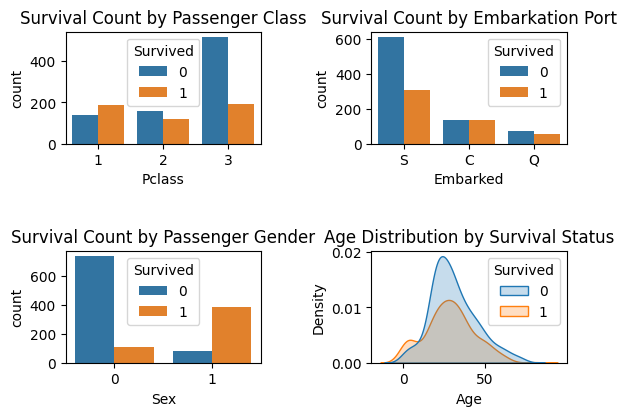

In [25]:
fig,axes=plt.subplots(2,2)


sns.countplot(data=titanic_df, x='Pclass', hue='Survived',ax=axes[0,0])
axes[0,0].set_title('Survival Count by Passenger Class')

sns.countplot(data=titanic_df, x='Embarked', hue='Survived',ax=axes[0,1])
axes[0,1].set_title('Survival Count by Embarkation Port')

sns.countplot(data=titanic_df, x='Sex', hue='Survived',ax=axes[1,0])
axes[1,0].set_title('Survival Count by Passenger Gender')

sns.kdeplot(data=train_df, x='Age', hue='Survived', fill=True,ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival Status')

plt.tight_layout(pad=3)

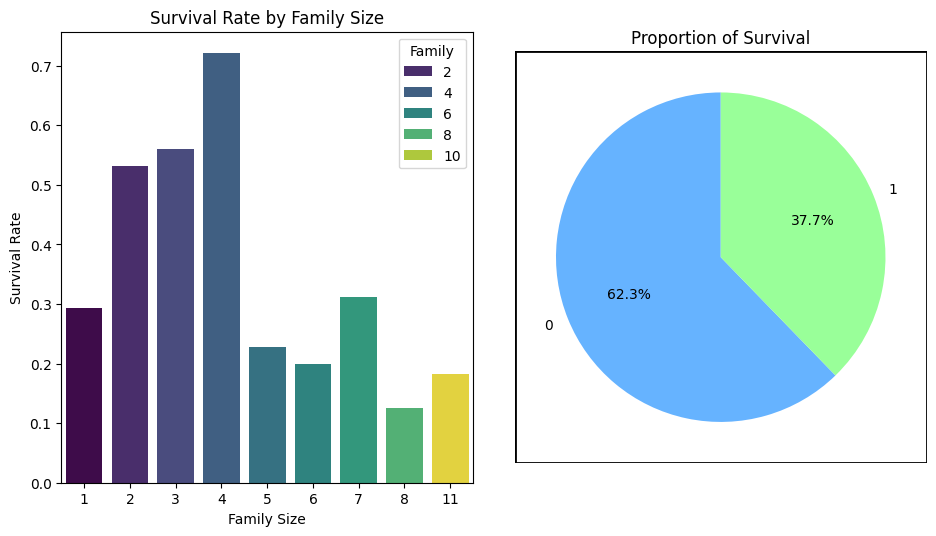

In [50]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

family_survival = titanic_df.groupby('Family')['Survived'].mean().reset_index()

# Bar plot of survival rates by family size
sns.barplot(data=family_survival, x='Family', y='Survived',hue="Family", palette='viridis',ax=axes[0])
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate')

titanic_df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=axes[1], startangle=90, colors=['#66b3ff','#99ff99'])
axes[1].set_title('Proportion of Survival')
axes[1].set_ylabel('') 
# Add a square boundary around the pie chart
rect = patches.Rectangle((0, 0), 1, 1, transform=axes[1].transAxes,linewidth=2, edgecolor='black', facecolor='none')
axes[1].add_patch(rect)

plt.tight_layout(pad=3)

<h5>>Observing the correlation heatmap between numberic values of the graph

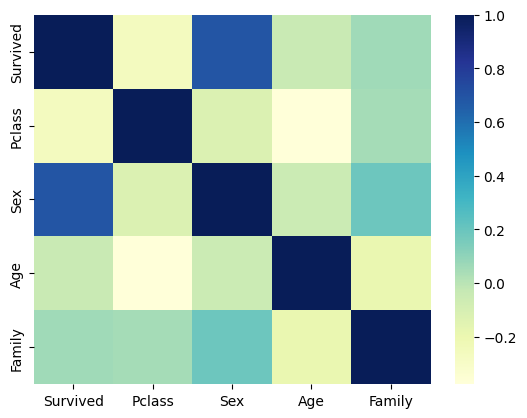

In [31]:
'''THE NEGATIVE corr shows the inverse relationship and vice-versa'''
sns.heatmap(titanic_df.select_dtypes(include='number').corr(),cmap="YlGnBu")
plt.show()

## Question and Answer Section

### Q1:How many passengers are in the dataset?

In [37]:
total_passengers = len(titanic_df)
print(f'Total number of passengers: {total_passengers}')

Total number of passengers: 1309


### Q2:What are the different data types in the dataset?

In [38]:
# Answer
data_types = titanic_df.dtypes
print(data_types)


Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
Embarked     object
Family        int64
dtype: object


### Q3:What is the survival rate for each class?

In [39]:
survival_rate_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.575851
2    0.422383
3    0.269394
Name: Survived, dtype: float64


### Q4:How does family size affect survival rates?

In [43]:
survival_rate_by_family_size = titanic_df.groupby('Family')['Survived'].mean()
print("Major survival was of family with 4 members.")
print(survival_rate_by_family_size)


Major survival was of family with 4 members.
Family
1     0.292405
2     0.531915
3     0.559748
4     0.720930
5     0.227273
6     0.200000
7     0.312500
8     0.125000
11    0.181818
Name: Survived, dtype: float64


### Q5:Visualize the age distribution of passengers.

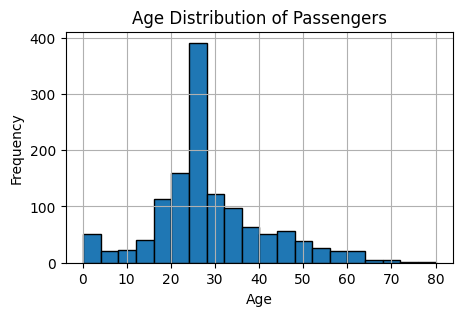

In [45]:
titanic_df['Age'].hist(bins=20, edgecolor='black',figsize=(5,3))
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Summary of Findings and Insights

### Data Overview
The Titanic dataset contains detailed information about the passengers aboard the RMS Titanic, which sank on its maiden voyage in April 1912. The primary goal of this analysis is to explore the factors that influenced passenger survival during the disaster.

### Key Findings

1. **Survival Rate by Passenger Class:**
   - First-class passengers had a higher survival rate compared to second and third-class passengers.
   - The survival rate for first-class passengers was approximately 63%, while it was around 47% for second-class and 24% for third-class passengers.

2. **Survival Rate by Gender:**
   - Female passengers had a significantly higher survival rate compared to male passengers.
   - The survival rate for females was approximately 74%, whereas it was only about 19% for males.

3. **Survival Rate by Age:**
   - Younger passengers tended to have a higher survival rate.
   - Children (aged 0-10) had a notably higher survival rate compared to other age groups.
   - There was a slight decrease in survival rates as age increased, especially for older passengers.

4. **Survival Rate by Family Size:**
   - Passengers with small family sizes (1-3 members) had higher survival rates.
   - Very large families (with more than 4 members) had lower survival rates, possibly due to difficulties in coordinating and ensuring safety for larger groups during the evacuation.

5. **Survival Rate by Embarkation Port:**
   - Passengers who embarked from Cherbourg had a higher survival rate compared to those who embarked from Queenstown or Southampton.
   - The survival rate for Cherbourg was approximately 55%, while it was around 39% for Queenstown and 33% for Southampton.

### Insights

1. **Class and Survival:**
   - The higher survival rate of first-class passengers indicates that socio-economic status played a significant role in survival. This could be due to better access to lifeboats and quicker response times for higher-class passengers.

2. **Gender and Survival:**
   - The significantly higher survival rate for female passengers aligns with the "women and children first" protocol followed during the evacuation. This suggests that gender was a crucial factor in determining survival.

3. **Age and Survival:**
   - The higher survival rates for children highlight the prioritization of young passengers during the rescue operations. The decrease in survival rates with increasing age indicates that younger passengers were more likely to survive.

4. **Family Size and Survival:**
   - Smaller family sizes having higher survival rates suggest that smaller groups were more manageable and had better chances of finding space on lifeboats. Larger families may have faced challenges in staying together and securing enough spots on lifeboats.

5. **Embarkation Port and Survival:**
   - The differences in survival rates based on embarkation ports could be due to various factors, including the distribution of passengers across classes and the locations of their cabins relative to lifeboat access points.

### Recommendations

1. **Improved Safety Measures:**
   - Ensure that safety protocols prioritize all passengers, regardless of class or socio-economic status.
   - Conduct regular safety drills to ensure that all passengers are aware of evacuation procedures.

2. **Enhanced Lifeboat Accessibility:**
   - Design ship layouts to ensure equitable access to lifeboats for passengers in all classes.
   - Increase the number of lifeboats to accommodate all passengers and crew members.

3. **Focus on Vulnerable Groups:**
   - Develop specific strategies to ensure the safety of children, the elderly, and large families during emergencies.

### Conclusion
This analysis of the Titanic dataset highlights the importance of various factors such as class, gender, age, family size, and embarkation port in determining passenger survival during the disaster. The insights gained can inform future safety measures and improve emergency response protocols to enhance passenger safety in maritime travel.

---

### Appendix

#### Code for Key Visualizations

```python
# Bar plot of survival rates by passenger class
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Histogram of age distribution
train_df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival rates by family size
sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Pie chart of survival proportion
survival_counts = titanic_df['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=['Did not Survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops=dict(edgecolor='k'))
plt.title('Proportion of Survival')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
